## import libraries

In [30]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline 

## Read Data

In [7]:
drugs=pd.read_csv('drug200.csv')

In [5]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
drugs.rename(columns={'Na_to_K':'Potassium Ration','Drug':'Drug_type'},inplace=True)

In [8]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               200 non-null    int64  
 1   Sex               200 non-null    object 
 2   BP                200 non-null    object 
 3   Cholesterol       200 non-null    object 
 4   Potassium Ration  200 non-null    float64
 5   Drug_type         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Explore Data

In [9]:
drugs['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

<AxesSubplot:>

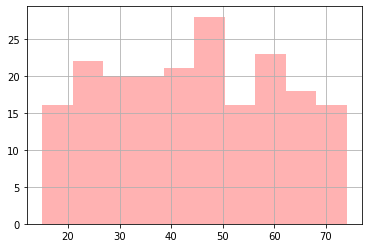

In [16]:
drugs['Age'].hist(color='red',alpha=0.3)

In [17]:
drugs['Potassium Ration'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Potassium Ration, dtype: float64

<AxesSubplot:>

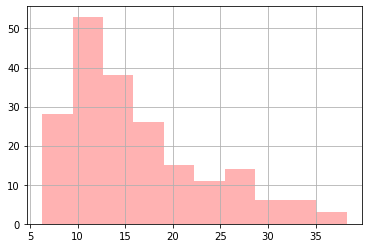

In [18]:
drugs['Potassium Ration'].hist(color='red',alpha=0.3)

### we can see:
- most of the people’s age around 44
    -  The minimum and maximum ages  are 15 and 74 years, respectively
    - 25% of the people are 31 years old or younger.
    - 50% of the people are 45 years old or younger (median).
    - 75% of the people are 58 years old or younger.
- quantity of Potassium around 16 mg
    -  The minimum and maximum Potassium  are 6 and 38mg.
    - 25% of the people taking 10.44 mg.
    - 50% of the people taking 13.93 mg.
    - 75% of the people taking 19.38 mg.

In [38]:
cat_cols=drugs.select_dtypes(include='object')

In [27]:
for col in cat_cols:
    print(f'{col}')
    print('*'*10)
    print(drugs[col].value_counts())
    

Sex
**********
M    104
F     96
Name: Sex, dtype: int64
BP
**********
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
Cholesterol
**********
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
Drug_type
**********
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug_type, dtype: int64


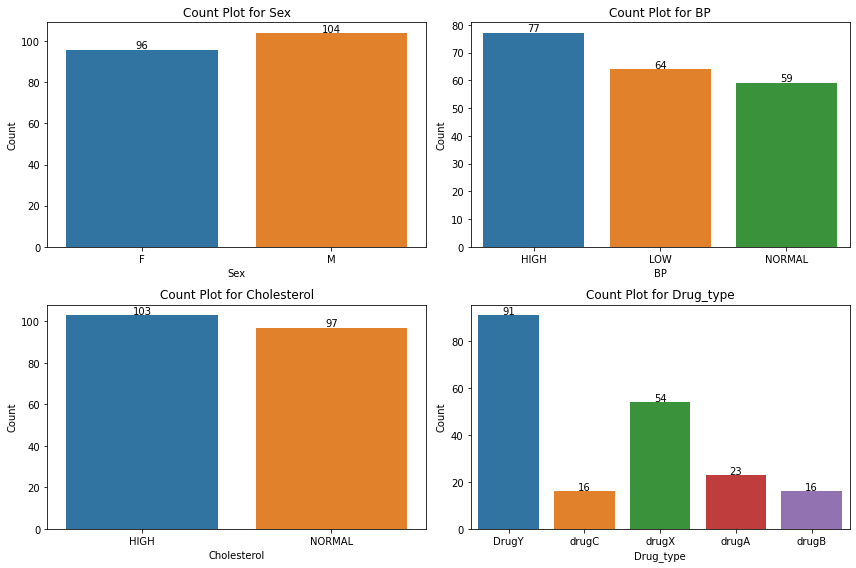

In [26]:
fig, axs = plt.subplots(2, 2,figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=drugs, x=col, ax=axs[i])
    axs[i].set_title(f'Count Plot for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    for patch in axs[i].patches:
        height = patch.get_height()
        axs[i].text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{height}', ha='center')

plt.tight_layout()
plt.show()



### we can see
- There are 104 people of males (M) and 96 of females (F) in the dataset.
- Blood Pressure (BP):

   - The distribution of blood pressure levels is as follows:
    - 77 people have high blood pressure (HIGH).
    - 64 people have low blood pressure (LOW).
    - 59 people have normal blood pressure (NORMAL).
- Cholesterol:

    - The distribution of cholesterol levels is as follows:
    - 103 people have high cholesterol levels (HIGH).
    - 97 people have normal cholesterol levels (NORMAL).
- Drug Type:

    - The distribution of drug types is as follows:
    - DrugY is the most common drug type with 91 people.
    - drugX follows with 54 people.
    - drugA, drugC, and drugB each have 23, 16, and 16 people, respectively.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


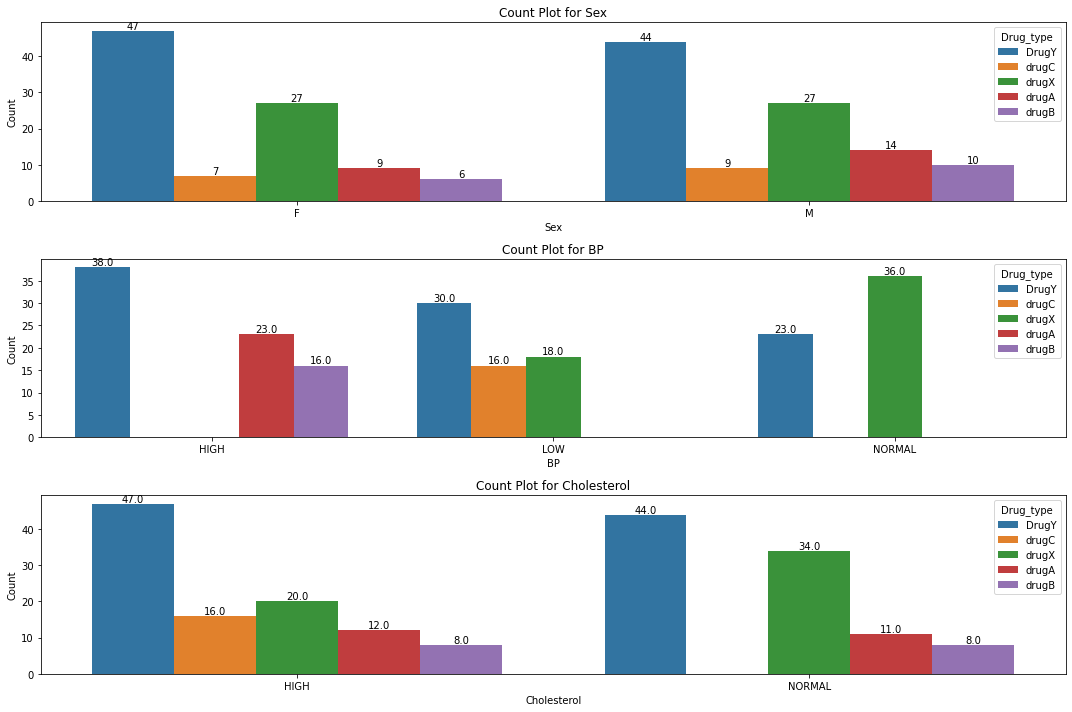

In [41]:
fig, axs = plt.subplots(3, 1,figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    if col !='Drug_type':
        sns.countplot(data=drugs, x=col,hue='Drug_type',ax=axs[i])
        axs[i].set_title(f'Count Plot for {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        for patch in axs[i].patches:
            height = patch.get_height()
            axs[i].text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{height}', ha='center')

plt.tight_layout()
plt.show()


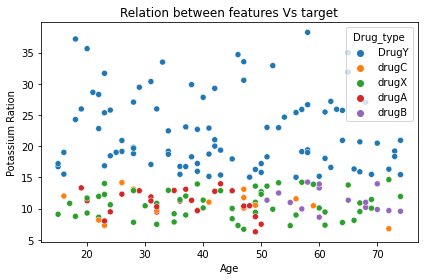

In [50]:
sns.scatterplot(data=drugs, x='Age',y='Potassium Ration',hue='Drug_type')
plt.title('Relation between features Vs target')
plt.tight_layout()
plt.show()
#num_cols

## Correlation between features

In [8]:
corr=drugs.corr()

<AxesSubplot:>

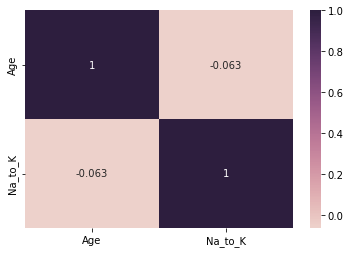

In [9]:
sns.heatmap(corr,annot=True ,cmap=sns.cubehelix_palette(as_cmap=True))

## Data Preprocessing

In [30]:
#check missing values
(drugs.isnull().sum()/drugs.shape[0]) *100

Age                 0.0
Sex                 0.0
BP                  0.0
Cholesterol         0.0
Potassium Ration    0.0
Drug_type           0.0
dtype: float64

In [31]:
#check for duplicates
drugs.duplicated().sum()

0

In [32]:
drugs.dtypes

Age                   int64
Sex                  object
BP                   object
Cholesterol          object
Potassium Ration    float64
Drug_type            object
dtype: object

## Feature Engineering

In [14]:
# make transformation like standardization and encoding categorical features
standar=StandardScaler()
encoder=OneHotEncoder(drop='first')

In [15]:
transformer=ColumnTransformer([
    ('standar',standar,['Age','Potassium Ration']),
    ('encoder',encoder,['Sex','BP','Cholesterol'])
])

## Split the data

In [16]:
X=drugs.drop('Drug_type',axis=1)
y=drugs['Drug_type']

In [17]:
X_transformed=transformer.fit_transform(X)
y.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [18]:
y_encod=y.replace({'DrugY':0,'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4})

In [102]:
y_encod.value_counts()

0    91
2    54
3    23
1    16
4    16
Name: Drug_type, dtype: int64

In [19]:
X_transformed=transformer.fit_transform(X)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_transformed,y_encod,test_size=0.2,random_state=42,stratify=y_encod)

## Model Building

In [21]:
# Logisitc Regression
log=LogisticRegression()

In [22]:
log.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=log.predict(x_train)
score=accuracy_score(y_pred,y_train)
score

0.98125

In [24]:
y_pred=log.predict(x_test)
score=accuracy_score(y_pred,y_test)
score

0.925

In [25]:
## Random Forest
randomclassifier=RandomForestClassifier()

In [26]:
randomclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=randomclassifier.predict(x_train)
score=accuracy_score(y_pred,y_train)
score

1.0

In [29]:
y_pred=randomclassifier.predict(x_test)
score=accuracy_score(y_pred,y_test)
score

0.975

## Model Evaluation

In [32]:
#use cross validation 
models=[LogisticRegression(),RandomForestClassifier()]
for model in models:
    scores=cross_val_score(model,X_transformed,y_encod,cv=6,scoring='accuracy')
    print(f'Model name:{model}\nscores:{scores}\nmean score:{scores.mean()}\nstd score:{scores.std()}')

Model name:LogisticRegression()
scores:[0.88235294 1.         0.93939394 1.         0.90909091 1.        ]
mean score:0.9551396316102198
std score:0.047790640522890955
Model name:RandomForestClassifier()
scores:[1.         1.         1.         1.         0.93939394 1.        ]
mean score:0.98989898989899
std score:0.022586545227270584


## Confusion matrix

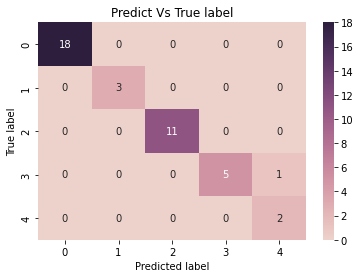

In [36]:
y_pred=randomclassifier.predict(x_test)
confuion=confusion_matrix(y_pred,y_test)
sns.heatmap(confuion,annot=True ,cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Predict Vs True label')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Conclusion:
- best model Random forest with avarge accuracy 98% 